## Tutorial 2 - data structure and pre-processing
#### Contents
* Pandas Series
* Pandas DataFrame Object
* Handle Missing Data
* Manipulate Datasets: Concat
* Pandas Aggregation
* GroupBy Datasets
* Filtering and Transformation
* Loading data from files

#### Common Requirements for Data Management
* Data structures with labeled axes. This prevents common errors from misaligned data as differently indexed data coming  from different sources
* The same data structures handle both time series data and non–time series data
* Arithmetic operations 
* Flexible handling of missing data
* Merge and other relational operations found in popular databases (SQL-based, for example)

#### Getting Started with pandas
import pandas as pd
* Two data structures: Series and DataFrame
* Reference link: 
https://pandas.pydata.org/pandas-docs/stable/reference/index.html

#### A Pandas Series
* A Pandas Series is an one-dimensional array of flexible indexed data. It can be created from a list or array.
* The Series wraps both a sequence of values and a sequence of indices, we can access with the values and index attributes.
* The index is an optional argument, you could define your own index.

In [1]:
#Build up a series
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [2]:
#show data values
data.index

RangeIndex(start=0, stop=4, step=1)

In [3]:
#show data at index =1 
data[1]

0.5

In [4]:
#show data at index = 0 to 3 (not include 3)
data[0:4]

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
#The index is an optional argument, you could define your own index in Pandas
# There are many ways to access the index and data value

In [6]:
#Build up a data series object, index specify as [100, 200, 300, 400]
data1 = pd.Series([1,5,10], index=[100, 200, 300])
data1

100     1
200     5
300    10
dtype: int64

In [7]:
#Build up a data series object, index specify as [a, b, c, d]
data2 = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data2

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
#index at 'b'
data2['b']

0.5

In [9]:
#data key; keys() function returns the 'info axis' for the pandas object. 
#If the pandas object is series then it returns index. If the pandas object is dataframe then it returns columns
data2.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
#item function:The items() function is used to iterator over (column name, Series) pairs.
list(data2.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [11]:
#assign new value at 'e', using Explicit index
data2['e'] = 1.25
data2

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [12]:
#show series value, index from a to c. Explicit index

data2['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [13]:
#show series value using Implicit index, index from 0 to 3 (3 not indluded) 
data2.iloc[:3] 

a    0.25
b    0.50
c    0.75
dtype: float64

In [14]:
data2[(data2 > 0.3) & (data2 < 0.8)]

b    0.50
c    0.75
dtype: float64

In [15]:
data2.drop(['b'])

a    0.25
c    0.75
d    1.00
e    1.25
dtype: float64

### Difference between Pandas series and Numpy list
It may look like the Series object is basically interchangeable with a one-dimensional NumPy array<br>
The essential difference is the presence of the index: 
* Numpy Array has an implicitly defined integer index used to access the values
* Pandas Series has an explicitly defined index associated with the values

### Practice 1
____
1. Build up a  data series object: data = pd.Series([1.5, 2.5, 0.75, 3.5],index=['100', '200', '300', '400']), show data<br>
_Expected output:_<br>
_100&emsp;1.50_<br>
_200&emsp;2.50_<br>
_300&emsp;0.75_<br>
_400&emsp;3.50_<br>
____
2. Show data at index 200 <br>
_Expected output:2.5_<br>
____
3. Add a data of 4.5 at index 500, show data<br>
_Expected output:_<br>
_100&emsp;1.50_<br>
_200&emsp;2.50_<br>
_300&emsp;0.75_<br>
_400&emsp;3.50_<br>
_500&emsp;4.50_<br>
____
4. show data at index 200-400<br>
_Expected output:_<br>
_200&emsp;2.50_<br>
_300&emsp;0.75_<br>
_400&emsp;3.50_<br>
____
5. Show data> 2, and data <=3.5<br>
_Expected output:_<br>
_200&emsp;2.50_<br>
_400&emsp;3.50_<br>
____
6. Remove the data at index 200, show new data<br>
_Expected output:_<br>
_100&emsp;1.50_<br>
_300&emsp;0.75_<br>
_400&emsp;3.50_<br>
_500&emsp;4.50_<br>



### Pandas DataFrame Object
* DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names
* The index starts from ‘0’


In [16]:
#Build up a dataframe object with 3 columns Name, Product_Qty, Good_Qty:  

import pandas as pd
Name =pd.Series(['Product A', 'Product B', 'Product C', 'Product D', 
                  'Product E'])
Product_Qty = pd.Series([423967, 695662, 241297, 270312, 449995])
Good_Qty = pd.Series([383322, 264481, 196511, 195528, 328821])
data = pd.DataFrame({'Name': Name, 'Product_Qty':Product_Qty, 'Good_Qty':Good_Qty})
data

,Name,Product_Qty,Good_Qty
0,Product A,423967,383322
1,Product B,695662,264481
2,Product C,241297,196511
3,Product D,270312,195528
4,Product E,449995,328821


In [17]:
#Data Indexing and selection

#show data: column of 'Good_Qty'
data[['Good_Qty']]

,Good_Qty
0,383322
1,264481
2,196511
3,195528
4,328821


In [18]:
#show data: row 0 to 3 (3 not included), column of 0 to 2 (2 not included)
data.iloc[1:3, :2]

,Name,Product_Qty
1,Product B,695662
2,Product C,241297


In [19]:
#show data: row- 1,2,4, columns of 1 to 2 (2 not included)
data.iloc[[1,2,4], 1:2]

,Product_Qty
1,695662
2,241297
4,449995


In [20]:
#add new row
Name1 = pd.Series(['Product F'], index=[5])
Product_Qty1 = pd.Series([671123],index=[5])
Good_Qty1 = pd.Series([651110],index=[5])

Name = pd.concat([Name, Name1])
Product_Qty = pd.concat([Product_Qty, Product_Qty1])
Good_Qty = pd.concat([Good_Qty, Good_Qty1])

data = pd.DataFrame({'Name': Name, 'Product_ Qty': Product_Qty, 'Good Qty': Good_Qty})
data

,Name,Product_ Qty,Good Qty
0,Product A,423967,383322
1,Product B,695662,264481
2,Product C,241297,196511
3,Product D,270312,195528
4,Product E,449995,328821
5,Product F,671123,651110


In [21]:
#add new column
passed_rate = Good_Qty/Product_Qty
data = pd.DataFrame({'Name': Name, 'Product_Qty':Product_Qty, 'Good_Qty':Good_Qty, 'Passed_rate':passed_rate})
data

,Name,Product_Qty,Good_Qty,Passed_rate
0,Product A,423967,383322,0.904132
1,Product B,695662,264481,0.380186
2,Product C,241297,196511,0.814395
3,Product D,270312,195528,0.723342
4,Product E,449995,328821,0.730721
5,Product F,671123,651110,0.970180


In [22]:
#assign new value to index [1,2]
data.iloc[1, 2] = 1000
data

,Name,Product_Qty,Good_Qty,Passed_rate
0,Product A,423967,383322,0.904132
1,Product B,695662,1000,0.380186
2,Product C,241297,196511,0.814395
3,Product D,270312,195528,0.723342
4,Product E,449995,328821,0.730721
5,Product F,671123,651110,0.970180


In [23]:
#show data pass rate >0.8
data[data.Passed_rate > 0.8]

,Name,Product_Qty,Good_Qty,Passed_rate
0,Product A,423967,383322,0.904132
2,Product C,241297,196511,0.814395
5,Product F,671123,651110,0.970180


____
### Practice 2 
____
1. Build up a Dataframe object :  

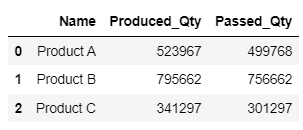

____
2. Show ‘Produced Qty’ for all<br>
_Expected output:_<br>
_0&emsp;523967_<br>
_1&emsp;795662_<br>
_2&emsp;341297_<br>
____
3. Add Product D (457892, 417765) and Product E (671123, 651111) , show the new dataframe.<br>
_Expected output:_<br>
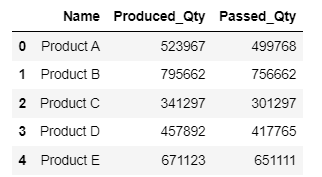
____
4. Add the Failed Qty column for each record, show the new dataframe<br>

Hint: Failed Qty = Produced Qty - Passed Qty <br>

_Expected output:_<br>
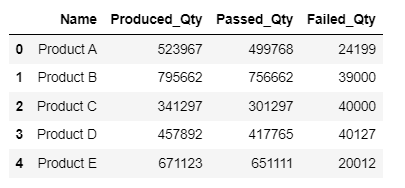
____
5. Add the Failed_rate column for each record, show the new dataframe<br>

Hint: Faileded_rate = Failed_Qty/Produced_Qty <br>

_Expected output:_<br>
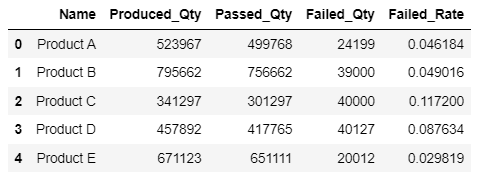
____
6. Show the record that the Failed_rate is greater than 10%, show the new dataframe<br>
_Expected output:_<br>
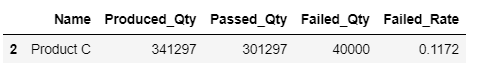
____
7. Update the Product A passed Qty to ‘512367’. <br> 

Hint: need recalculate of Failed Qty and Failed_rate<br> 

_Expected output:_<br>
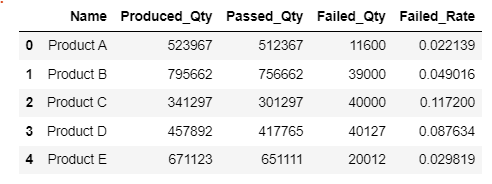
____
8. Remove Product B record, show the new dataframe. <br>
_Expected output:_<br>
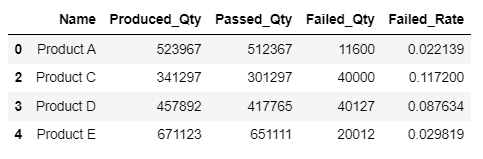
____

### Handle missing data
* Real-world data is rarely clean and homogeneous
* Many interesting datasets will have some amount of data missing
* Built-in Pandas tools for handling missing data in Python as null, NaN, or NA values.
    * Check the missing data:  data.isnull()
    * Filling methods:  
        * Drop null : data.dropna()
        * Fill using a value data.fillna(0)
        * a forward-fill to propagate the previous value forward data.fillna(method='ffill')
        * a back-fill to propagate the next values backward data.fillna(method='bfill')
        * Interpolation  - you can estimate unknown data points between two known data points. data.interpolate()
        * Polynomial interpolation requires you to specify an order. Ex: interpolate(method='polynomial', order=2) 

### Interpolation method
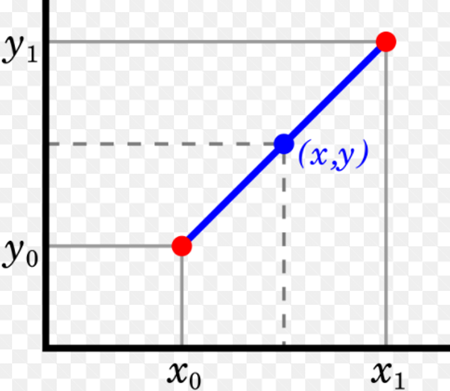
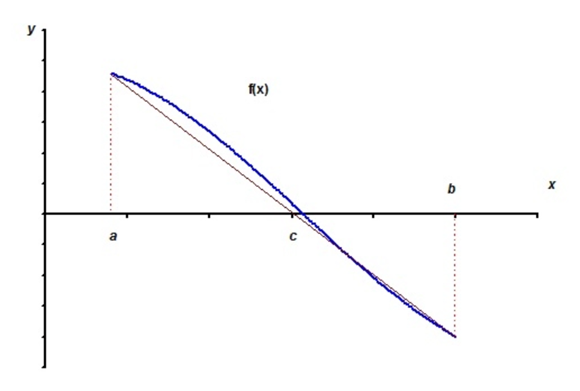

### Handling Missing Data Example:
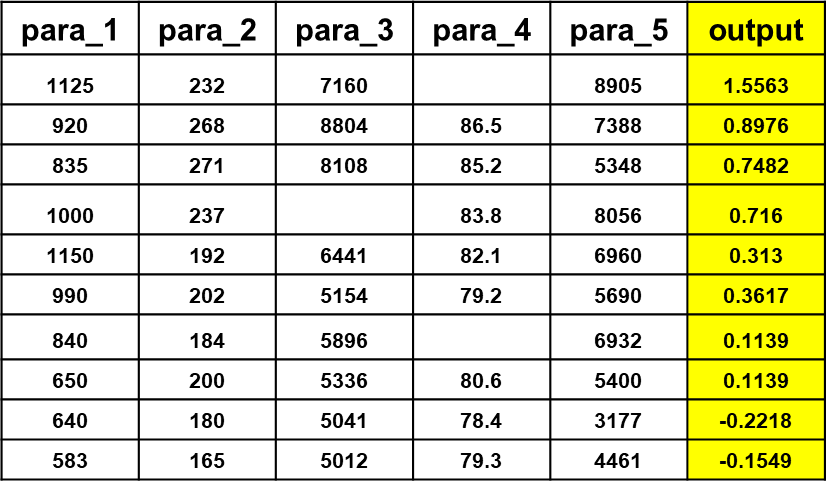
<br>
* Forward-fill:  forward-fill to propagate the previous value forward
* Back-fill: backward-fill to propagate the next values backward
* Interpolation

In [24]:
#create a data series with null value
import numpy as np
import pandas as pd
data = pd.Series([1, np.nan, 2, None])
data

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [25]:
#check which item is null
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [26]:
#display data value is not null
data[data.notnull()]

0    1.0
2    2.0
dtype: float64

In [27]:
#drop null value
data = data.dropna()
data

0    1.0
2    2.0
dtype: float64

In [28]:
#create a data series with null value
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [29]:
#Sometimes rather than dropping NA values, you’d rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
#fill null value with zero value
data.fillna(5)

a    1.0
b    5.0
c    2.0
d    5.0
e    3.0
dtype: float64

In [30]:
# forward-fill:
data.ffill()

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [31]:
# backward-fill:   
data.bfill()

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [32]:
# create a datafram object with null
import numpy as np
import pandas as pd
df = pd.DataFrame([[1,np.nan,2], [2,3,5],[np.nan,4,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [33]:
#check which item is null
df.isnull()

,0,1,2
0,False,True,False
1,False,False,False
2,True,False,False


In [34]:
#drop the data which rows are null
df.dropna()

,0,1,2
1,2.0,3.0,5


In [35]:
#drop the data which columns are null
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [36]:
#add in a new column that are all null value
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [37]:
#Count the missing values in each column
df.isna().sum()

0    1
1    1
2    0
3    3
dtype: int64

In [38]:
#only drop rows/columns that are all values are null 
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [39]:
#To specify a minimum number of non-null values for the row/column to be kept. E.g.: to keep rows that have 3 no-missing values
df.dropna(axis='columns', thresh=3)

,2
0,2
1,5
2,6


In [40]:
#Forward fill (on columns)
df.ffill(axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [41]:
#Forward fill (on rows)
df.ffill(axis=0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [42]:
#backward fill (on rows)
df.bfill(axis=0)

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


### Pandas concat vs join vs merge
* Concat gives the flexibility to join based on the axis(all rows or all columns).
* Join is based on the indexes (set by set_index) on how variable= ['left','right','inner','couter']
* Merge is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'

In [43]:
#Combining Datasets: Concat
#build 2 data series and concate into 1 series
import pandas as pd
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])      
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])       
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [44]:
#build 2 data series and concate into 1 series
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd']) 

#Combine two Series, depulicate in index
pd.concat([s1, s2]) 

0    a
1    b
0    c
1    d
dtype: object

In [45]:
#Clear the existing index and reset it by setting the ignore_index option to True.
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [46]:
#define a funciton to generate data
def make_df(cols, ind):
    """ make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

In [47]:
# create 2 dataframe and Concat on rows
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [48]:
# create 2 data frame and merge them
df7 = pd.DataFrame({'machine': ['Machine 1', 'Machine 2', 'Machine 3', 'Machine 4'],
                    'group': ['Turning', 'Milling', 'Milling', 'Grinding']})
df8 = pd.DataFrame({'machine': ['Machine 1', 'Machine 2', 'Machine 3', 'Machine 4'],
                    'purchased_date': [2004, 2008, 2012, 2014]})
# Merge 2 data frame
df9 = pd.merge(df7, df8)
print(df7); print(df8); print(df9)

     machine     group
0  Machine 1   Turning
1  Machine 2   Milling
2  Machine 3   Milling
3  Machine 4  Grinding
     machine  purchased_date
0  Machine 1            2004
1  Machine 2            2008
2  Machine 3            2012
3  Machine 4            2014
     machine     group  purchased_date
0  Machine 1   Turning            2004
1  Machine 2   Milling            2008
2  Machine 3   Milling            2012
3  Machine 4  Grinding            2014


### Simple built-in Aggregation in Pandas

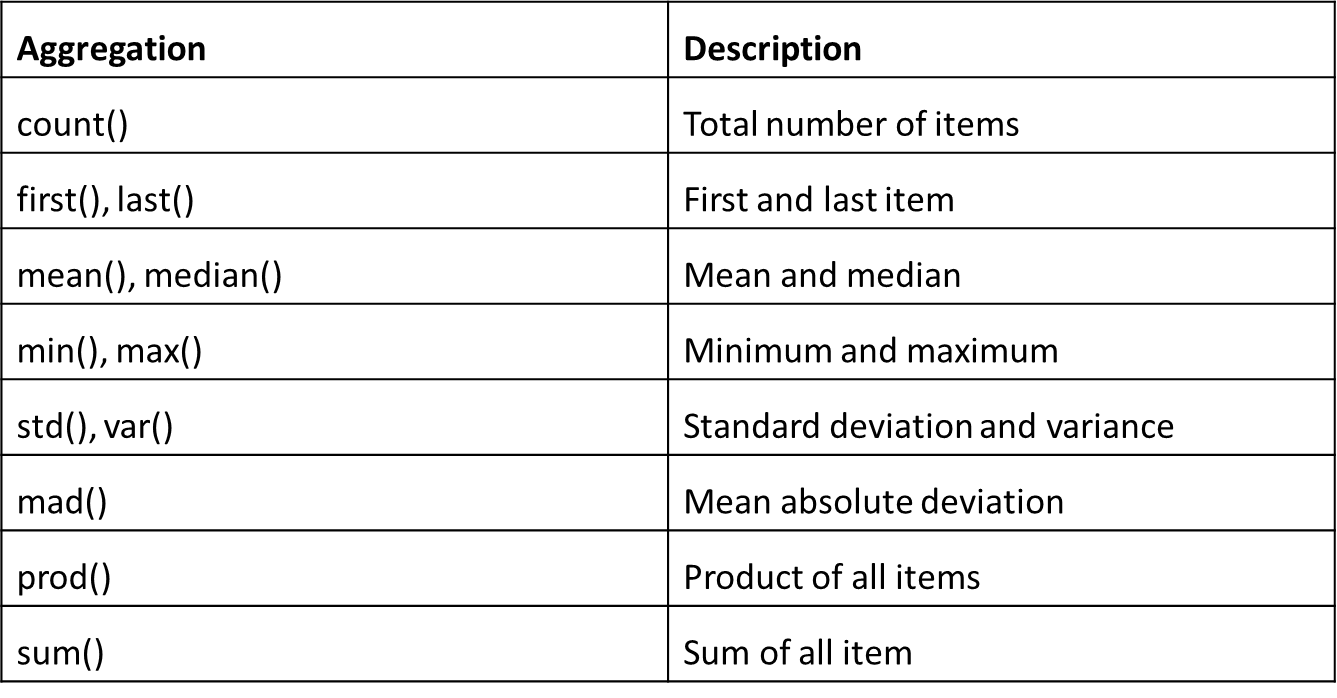

In [49]:
import numpy as np
# create a random series
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
print(ser)
#sum the series and round to 3 decimal point
round(ser.sum(), 3)
#calculate the mean value and round to 3 decimal point
round(ser.mean(),3)

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64


0.562

In [50]:
#create a datafrome object
df11 = pd.DataFrame({'A': rng.rand(5),'B': rng.rand(5)})
print(df11)
# get mean value for each column
df11.mean()
# get mean value for each row
#df11.sum(axis=1)

          A         B
0  0.155995  0.020584
1  0.058084  0.969910
2  0.866176  0.832443
3  0.601115  0.212339
4  0.708073  0.181825


A    0.477888
B    0.443420
dtype: float64

### Groupby 
* The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.<br>
* The apply step involves computing some function, usually an aggregate, transformation, or filtering within the individual groups.<br>
* The combine step merges the results of these operations into an output array<br>
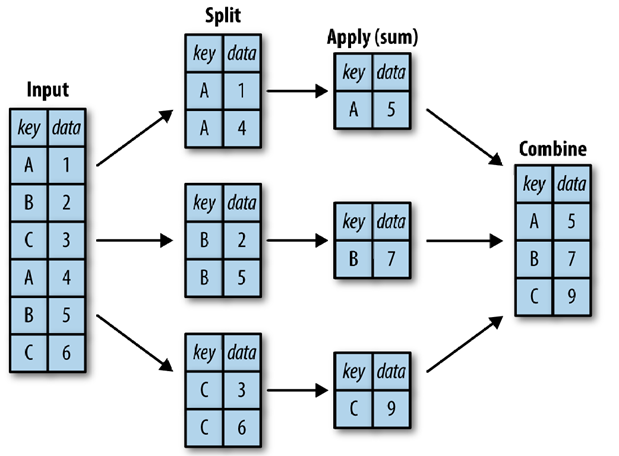


In [51]:
#crete a data frame

rng = np.random.RandomState(0)
df13 = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                           'data1': range(6),
                           'data2': rng.randint(0, 10, 6)},
                           columns = ['key', 'data1', 'data2'])
df13

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [52]:
# get the min, median, max value for data 1 & 2 columns, groupby key (‘A’, ‘B’, ‘C’)

df13.groupby('key').aggregate(['min', np.median, max])

C:\Users\AlitheiaDeus\AppData\Local\Temp\ipykernel_24704\778665130.py:3: FutureWarning: The provided callable <function median at 0x0000021522A6D080> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df13.groupby('key').aggregate(['min', np.median, max])
C:\Users\AlitheiaDeus\AppData\Local\Temp\ipykernel_24704\778665130.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df13.groupby('key').aggregate(['min', np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [53]:
# get the std for data 1 & data2 columns, groupby key (‘A’, ‘B’, ‘C’)
print(df13); print(df13.groupby('key').std());

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


### Filtering
A filtering operation allows you to drop data based on the group properties. <br>
For Example: We want to keep all groups in which the standard deviation is larger than some critical value

### Transformation
Transformation can return some transformed version of the full data to recombine 

In [54]:
#define a filter function (std>4)
def filter_func(x):
    return x['data2'].std() > 4

In [55]:
#apply the filer function to df13
print(df13.groupby('key').filter(filter_func))

  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [56]:
#get the mean value group by key
df13.groupby('key').mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [57]:
#each data value mins its groups mean
print(df13)
df13.groupby('key').transform(lambda x: x - x.mean())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9


,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


# Practice 3 
____
1. Build up two Dataframe objects: <br>
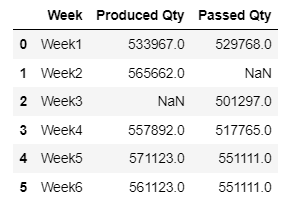
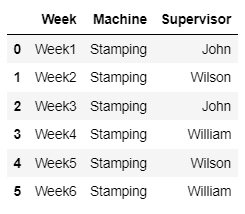
____
2. Use average to fill for NaN.<br>
_Expected output:_<br>
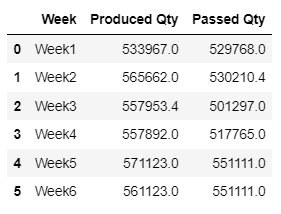
____
3. Merge 2 Datasets.<br>
_Expected output:_<br>
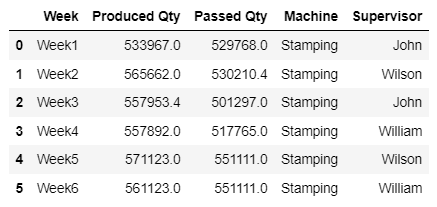
____
4. Add in the Passed_rate column for each record.<br>
_Expected output:_<br>
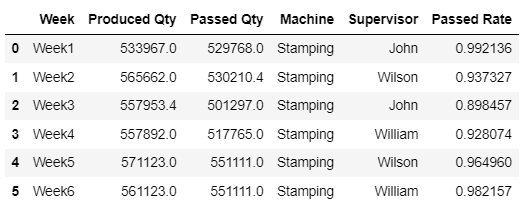
____
5. Calculate the average Passed_rate by each supervisor.<br>
_Expected output:_<br>
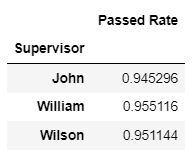
____
6. Calculate the total Produced_Qty by each supervisor.<br>
_Expected output:_<br>
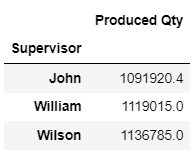
____
7. Give your conclusion : which supervisor is most efficient (highest Produced_Qty and Passed_rate?)<br>

Hint: <br>
Rank the total Produced_Qty for the supervisors from high to low.<br>
Rank the quality (average Passed rate) for the supervisors from high to low.<br>

_Expected output:_<br>
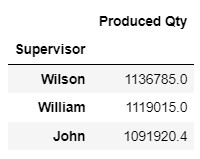
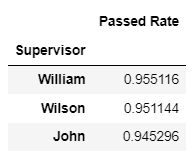
____

### Load a CSV File
* Many datasets are stored in .csv or .xlsx files because they are more efficient. <br>
    * .csv stands for Comma Separated file. <br>
    * .xlsx file stands for excel file. 
* We can load data from .csv or .xlsx files or save data into these files. 

In [58]:
# Load library
import pandas as pd

# Create path fro .csv file
path = 'machine_running_duration.csv'

# Load dataset
dataframe = pd.read_csv(path)

# View first two rows
dataframe.head(10)

,machine,Running time
0,machine_1,300
1,machine_2,420
2,machine_3,750
3,machine_4,860


In [59]:
#pip install --upgrade openpyxl

In [64]:
# Load library
import pandas as pd

# Create path
path = 'machine_running_duration - Copy.csv'

# Load data
dataframe = pd.read_csv(path)
#print(dataframe)

#Concate from different sheet and generate a new dataframe
df = pd.concat(pd.read_excel(path), ignore_index=True)
print(df)

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [ ]:
# Load library
import pandas as pd

# Create path
path = 'machine_running_duration.xlsx'

# Load data from different sheets in the same file
df = pd.concat(pd.read_excel(path, sheet_name=None), ignore_index=True)
print (df)

#Save to .csv
df.to_csv('machine_running' + '.csv', index=False)
#Save to .excel
df.to_excel('machine_running' + '.xlsx', index=False)